In [88]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import geopandas
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Import data
df = pd.read_csv("data/voter_fraud_cases.csv")

# Clean data
df['Year'] = df['Year'].astype(int)

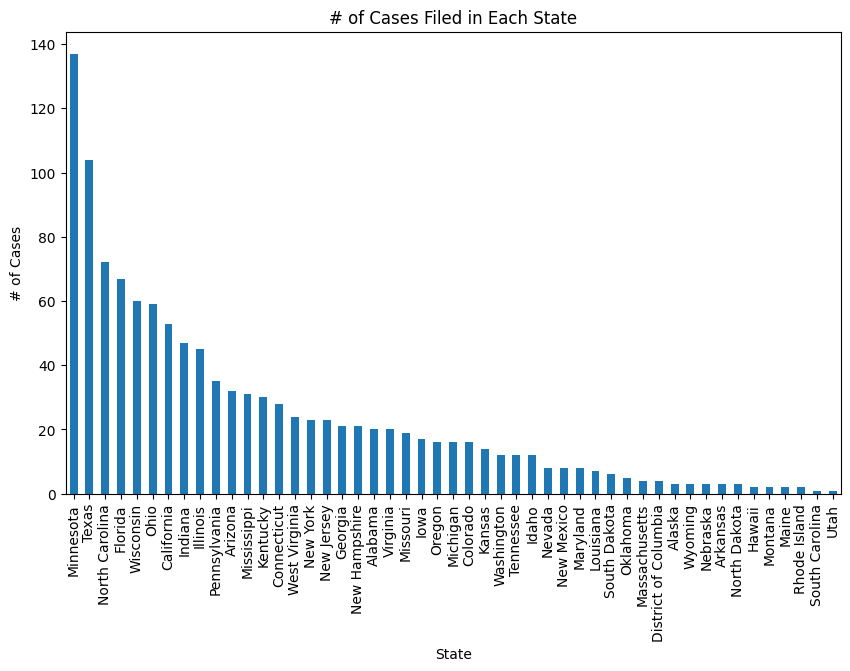

In [89]:
# A chart with the number of cases filed in each state

# Create a bar chart
df['State'].value_counts().plot(kind='bar', figsize=(10, 6))

# Add labels and plot
plt.xlabel('State')
plt.ylabel('# of Cases')
plt.title('# of Cases Filed in Each State')
plt.show()

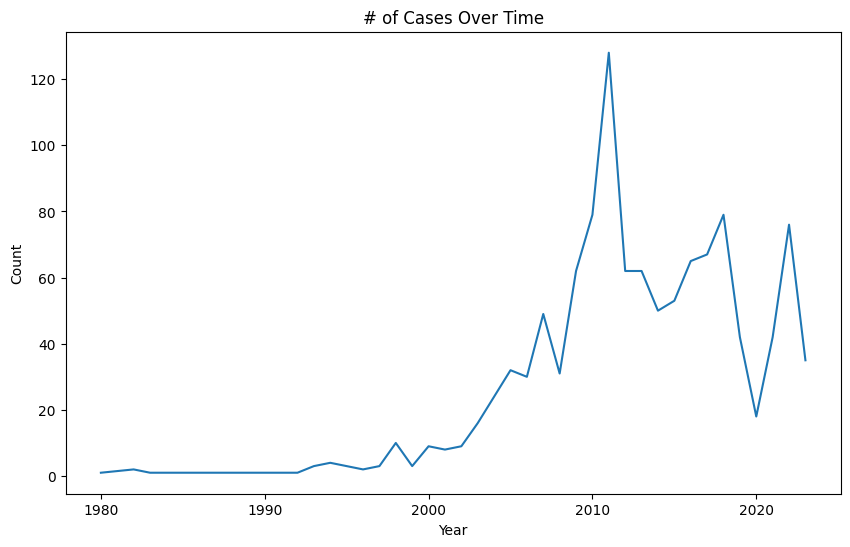

In [90]:
# A chart with the number of cases filed in each year

# Group data by year
grouped_data = df.groupby('Year', dropna=True).size()
grouped_data.plot(kind='line', figsize=(10, 6))

# Add labels
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('# of Cases Over Time')

# Show plot
plt.show()

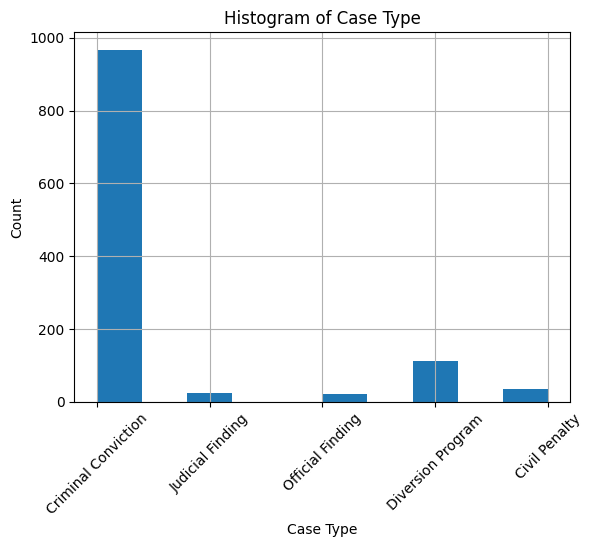

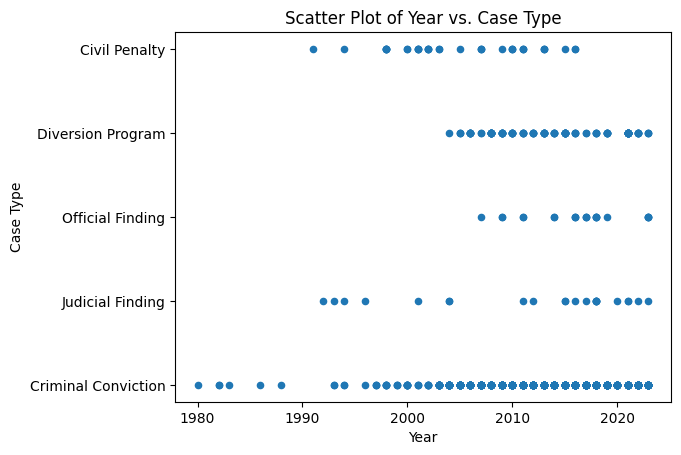

In [91]:
# Example 1: Histogram
df['Case Type'].hist()
plt.xlabel('Case Type')
plt.ylabel('Count')
plt.title('Histogram of Case Type')
plt.xticks(rotation=45) 
plt.show()

# Example 2: Scatter plot
df.plot.scatter(x='Year', y='Case Type')
plt.xlabel('Year')
plt.ylabel('Case Type')
plt.title('Scatter Plot of Year vs. Case Type')
plt.show()

Text(0.07, 0.05, 'Source: Heritage Foundation')

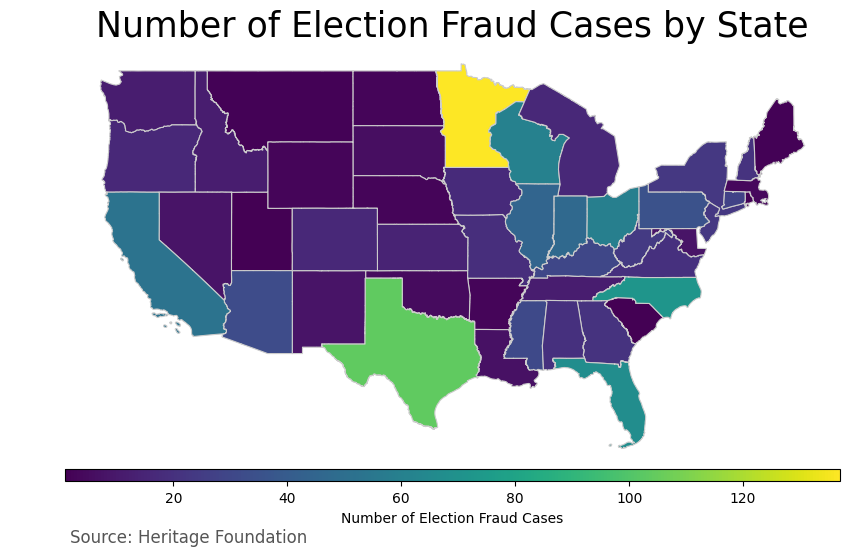

In [92]:
# Number of Election Fraud Cases by State

# Load the shapefile data
states = geopandas.read_file('shape_file/tl_2012_us_state.shp')

# Setup map
states = states.to_crs("EPSG:3395")
states = states[states['STUSPS'].isin(['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 
                                       'DE', 'FL', 'GA', 'IA', 'ID', 'IL', 
                                       'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 
                                       'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 
                                       'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 
                                       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 
                                       'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 
                                       'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])]

# Merge the counts with the shapefile data
counts = df['State'].value_counts()
states = states.merge(counts, left_on='NAME', right_index=True)

fig, ax = plt.subplots(1, figsize=(10, 6))

# Create a divider for the colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="3%", pad=0.01)

# Plot the map with color based on counts
states.plot(
    cmap='viridis', 
    column='count', 
    figsize=(15, 10), 
    legend=True, 
    cax=cax,
    legend_kwds={"label": "Number of Election Fraud Cases", "orientation": "horizontal"},
    linewidth=0.8, ax=ax, edgecolor='0.8'
    );

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Number of Election Fraud Cases by State', fontdict={'fontsize': '25', 'fontweight' : '2'})
                                                           
# create an annotation for the data source
ax.annotate('Source: Heritage Foundation',xy=(0.07, .05),  xycoords='figure fraction', horizontalalignment='left', 
            verticalalignment='top', fontsize=12, color='#555555')

In [93]:
# Load voting data
df_voting = pd.read_csv("data/voting_data_1980_to2022.csv",na_values=0)

# Clean data
df_voting = df_voting.dropna(how='any')
df_voting['Votes_Cast'] = df_voting['Votes_Cast'].astype(int)

# Total votes cast
total_votes = df_voting['Votes_Cast'].sum()
print("Total Votes Cast: " + str("{:,}".format(total_votes)))

# Total cases of voter fraud
total_fraud = len(df)
print("Total Cases of Voter Fraud: " + str("{:,}".format(total_fraud)))

print("------------------------------------------------------------------")

# Declare the multiplier
our_multiplier = 1.3
total_fraud = len(df) * our_multiplier
total_fraud = int(total_fraud)
print("Total Cases of Voter Fraud (with  a multiplier of x " + str(our_multiplier) +"): " + str("{:,}".format(total_fraud)))

# Percentage of votes cast that are fraudulent
percent_fraud = total_fraud / total_votes
print("Percentage of Votes Cast that are Fraudulent: " + '{:.8%}'.format((percent_fraud)))

print("------------------------------------------------------------------")

# Declare the multiplier
our_multiplier = 250
total_fraud = len(df) * our_multiplier
total_fraud = int(total_fraud)
print("Total Cases of Voter Fraud (with  a multiplier of x " + str(our_multiplier) +"): " + str("{:,}".format(total_fraud)))

# Percentage of votes cast that are fraudulent
percent_fraud = total_fraud / total_votes
print("Percentage of Votes Cast that are Fraudulent: " + '{:.8%}'.format((percent_fraud)))

print("------------------------------------------------------------------")

# Declare the multiplier
our_multiplier = 15465
total_fraud = len(df) * our_multiplier
total_fraud = int(total_fraud)
print("Total Cases of Voter Fraud (with  a multiplier of x " + str(our_multiplier) +"): " + str("{:,}".format(total_fraud)))

# Percentage of votes cast that are fraudulent
percent_fraud = total_fraud / total_votes
print("Percentage of Votes Cast that are Fraudulent: " + '{:.8%}'.format((percent_fraud)))

print("------------------------------------------------------------------")

Total Votes Cast: 1,795,549,467
Total Cases of Voter Fraud: 1,161
------------------------------------------------------------------
Total Cases of Voter Fraud (with  a multiplier of x 1.3): 1,509
Percentage of Votes Cast that are Fraudulent: 0.00008404%
------------------------------------------------------------------
Total Cases of Voter Fraud (with  a multiplier of x 250): 290,250
Percentage of Votes Cast that are Fraudulent: 0.01616497%
------------------------------------------------------------------
Total Cases of Voter Fraud (with  a multiplier of x 15465): 17,954,865
Percentage of Votes Cast that are Fraudulent: 0.99996493%
------------------------------------------------------------------


In [101]:
# How many times does the word "Democrat" appear in the case description?
print("------------------------------------------------------------------")
print("Number of times the word 'Democrat' appears in the case description:")
print(df.applymap(lambda x: 'Democrat' in str(x)).sum())
print()

# How many times does the word "Republican" appear in the case description?
print("------------------------------------------------------------------")
print("Number of times the word 'Republican' appears in the case description:")
print(df.applymap(lambda x: 'Republican' in str(x)).sum())
print()

------------------------------------------------------------------
Number of times the word 'Democrat' appears in the case description:
ID              0
State           0
Year            0
Name            1
Case Type       0
Fraud Type      0
Outcomes      124
Source          0
dtype: int64

------------------------------------------------------------------
Number of times the word 'Republican' appears in the case description:
ID             0
State          0
Year           0
Name           0
Case Type      0
Fraud Type     0
Outcomes      59
Source         0
dtype: int64

